In [1]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
import py3Dmol
import pandas as pd

RDKit WARNING: [10:30:02] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
# read molecule
suppl = Chem.SDMolSupplier('./sdf/platinum_dataset_2017_01.sdf', removeHs=False)
mols = [x for x in suppl if x is not None]
# len(mols)

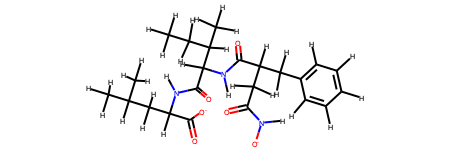

In [3]:
mol = mols[0]
smtest = Chem.MolToSmiles(mol)
mtest = Chem.MolFromSmiles(smtest)
m_htest = Chem.AddHs(mtest)
m_htest

In [4]:
def conf_generation(mol, numConfs, rms):
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    num_of_confs = []
    for i in rms:
        confids = AllChem.EmbedMultipleConfs(m_h, numConfs=numConfs, randomSeed=1234, pruneRmsThresh=i, numThreads=0)
        num_of_confs.append((i, len(confids)))
    
    return num_of_confs

rms = [0.5, 1.0, 1.5, 2.0]
num_of_confs = conf_generation(mol, 1000, rms)

In [13]:
for i in num_of_confs:
    print(i)

(0.5, 1000)
(1.0, 998)
(1.5, 843)
(2.0, 265)


In [12]:
mol = mols[0]
sm_test = Chem.MolToSmiles(mol)
m_test = Chem.MolFromSmiles(sm_test)
m_h_test = Chem.AddHs(m_test)
cids_test = AllChem.EmbedMultipleConfs(m_h_test, numConfs=100, randomSeed=1234, pruneRmsThresh=2, numThreads=0)


rmsd_test = []
m_test = Chem.RemoveHs(m_h_test)


In [24]:
AllChem.UFFOptimizeMoleculeConfs(m_h_test, numThreads=0)


[(0, 45.01019684539773),
 (1, 47.69093997962961),
 (1, 41.203013593756076),
 (1, 41.82452935930037),
 (1, 43.5061727808862),
 (1, 46.483936195098316),
 (1, 46.246280831312035),
 (1, 42.57961622646165),
 (1, 41.04048510725408),
 (1, 42.23246057425159),
 (1, 36.08759650087166),
 (0, 40.33018182845635),
 (1, 41.99043364625938),
 (0, 42.44232313279096),
 (1, 42.33295114643878),
 (1, 44.95622090122325),
 (0, 41.280765833083),
 (0, 41.82410436387364),
 (1, 45.07725579869078),
 (1, 40.61843466859741),
 (1, 41.17402983043115),
 (1, 40.47699581648325),
 (1, 39.49137660782719),
 (1, 39.241079958259746),
 (1, 48.23584580279666),
 (1, 45.651825127033106),
 (1, 39.80605157068149),
 (1, 39.915983459096),
 (1, 45.398213249831315),
 (1, 41.8131007925036),
 (1, 54.257300348015455),
 (1, 42.17852611820054),
 (0, 37.68487640680897),
 (1, 41.15994079014598),
 (1, 42.70185184727726),
 (0, 42.61781227034683),
 (1, 46.356367582634256),
 (1, 41.62044021464719),
 (1, 41.6660938031771),
 (1, 41.431141081711736)

In [15]:
for cid in cids_test:
    rmsd_test.append(AllChem.GetConformerRMS(m_test, 0, cid))

rmsd_test

[0.0,
 2.945148003079379,
 2.6877992216118227,
 2.4436763749094426,
 2.6264635258989446,
 1.8514781850950335,
 2.19130585350164,
 2.0528522591106295,
 2.602199606904684,
 2.2766938206984872,
 3.1182706090522823,
 2.9160049725504282,
 3.1550139673700026,
 2.4722665972389835,
 2.8394737019938776,
 2.9903164157670936,
 2.4837470493156895,
 2.4963795146012813,
 2.869999898056474,
 2.503140441334511,
 2.099948417694484,
 3.1810224169516093,
 2.1966999402989447,
 2.232028479913319,
 2.849004610140913,
 2.0656487315162737,
 1.7892003770715974,
 3.300845428805136,
 2.5214635981762,
 2.8217536048855094,
 3.566043373498134,
 2.5860768959187346,
 2.0786360329184608,
 2.3785773976485753,
 2.800658763707593,
 2.5421241188578847,
 2.69679201058714,
 2.6631924495339434,
 2.43697114979953,
 1.4121324749292636,
 2.3767136453186573,
 2.9326492970218028,
 2.094359026270612,
 2.743763849351924,
 2.793030433007768,
 2.2568064433515698,
 3.599918312842664,
 3.2479264701223824,
 2.300569776921468,
 2.2594125

In [6]:
def mm_opt(mol, ff):
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    cids = AllChem.EmbedMultipleConfs(m_h, numConfs=100, randomSeed=1234, pruneRmsThresh=2, numThreads=0)
    
    if ff == 'uff':
        AllChem.UFFOptimizeMoleculeConfs(m_h, numThreads=0)
    if ff == 'mmff':
        AllChem.MMFFOptimizeMoleculeConfs(m_h, numThreads=0)
    rmsd = []
    m = Chem.RemoveHs(m_h)
    for cid in cids:
        rmsd.append(AllChem.GetConformerRMS(m, 0, cid))
    return rmsd

uff_rmsd = mm_opt(mol, 'uff')
mmff_rmsd = mm_opt(mol, 'mmff')
df = pd.DataFrame({'uff': uff_rmsd, 'mmff': mmff_rmsd})
df.describe().round(2)

,uff,mmff
count,72.00,72.00
mean,2.67,2.58
std,0.57,0.60
min,0.00,0.00
25%,2.36,2.33
50%,2.73,2.74
75%,3.07,2.96
max,3.91,3.85


In [27]:
def opt_sp_mm(mol, ff):
    # generate 1000 conformers
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    cids = AllChem.EmbedMultipleConfs(m_h, numConfs=1000, randomSeed=1234, pruneRmsThresh=2, numThreads=0)
    
    # optimize each conformers and calculate energy
    energy = []
    if ff == 'uff':
        for cid in cids:
            uff = AllChem.UFFGetMoleculeForceField(m_h, confId=cid)
            uff.Minimize()
            energy.append((uff.CalcEnergy(), cid))
    if ff == 'mmff':
        prop = AllChem.MMFFGetMoleculeProperties(m_h)
        for cid in cids:
            mmff = AllChem.MMFFGetMoleculeForceField(m_h, prop, confId=cid)
            mmff.Minimize()
            energy.append((mmff.CalcEnergy(), cid))
    
    # sort energy and store relative energy and ID to the list
    energy.sort()
    return [(i-energy[0][0], j) for i,j in energy]

uff_e = opt_sp_mm(mol, 'uff')
mmff_e = opt_sp_mm(mol, 'mmff')

In [35]:
print(uff_e[0:5])
print(mmff_e[0:5])

[(0.0, 71), (0.8680767627518122, 144), (1.1093474183794996, 164), (1.1606893327714332, 223), (1.3767404084060857, 10)]
[(0.0, 151), (1.0154467648072085, 196), (1.5150582844411247, 170), (2.404494467880781, 43), (2.6960686078414824, 262)]


In [38]:
# function for generating conformers and structure optimization
def get_confs(mol, ff):
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    cids = AllChem.EmbedMultipleConfs(m_h, numConfs=1000, randomSeed=1234, pruneRmsThresh=2, numThreads=0)
    
    if ff == 'uff':
        for cid in cids:
            uff = AllChem.UFFGetMoleculeForceField(m_h, confId=cid)
            uff.Minimize()
    if ff == 'mmff':
        prop = AllChem.MMFFGetMoleculeProperties(m_h)
        for cid in cids:
            mmff = AllChem.MMFFGetMoleculeForceField(m_h, prop, confId=cid)
            mmff.Minimize()
    return Chem.RemoveHs(m_h)

# get ID of five stable structures
uff_confIds = [j for i, j in uff_e[:5]]
mmff_confIds = [j for i, j in mmff_e[:5]]

# get optimized conformers by UFF or MMFF
uff = get_confs(mol, 'uff')
mmff = get_confs(mol, 'mmff')

# get matching structure for benzene template
core = uff.GetSubstructMatch(Chem.MolFromSmiles('C1=CC=CC=C1'))

# align conformers by template
AllChem.AlignMolConformers(uff, atomIds=core)
AllChem.AlignMolConformers(mmff, atomIds=core)

# draw conformers on stacks
v = py3Dmol.view(width=600, height=600)
for cid in uff_confIds:
    IPythonConsole.addMolToView(uff, confId=cid, view=v)
v.setBackgroundColor('0xeeeeee')
v.zoomTo()
v.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol